In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/CV/Lab3/
!ls

from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as ex
from skimage import restoration, transform
from scipy import signal, ndimage
import math

import dftfilter
import bsfilter
import checkerboard
import deconvwnr
import imnoise2
import spfilt
import fspecial

##Генерування шуму із заданим розподілом

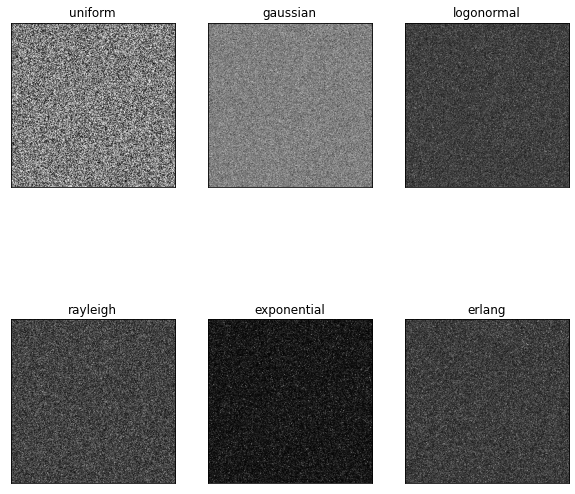

In [ ]:
noises = np.array(
    [imnoise2.imnoise2('uniform',(256,256),0,1), imnoise2.imnoise2('gaussian',(256,256),0.5,0.1), imnoise2.imnoise2('lognormal',(256,256),0.3,0.25),
     imnoise2.imnoise2('rayleigh',(256,256),0,0.1), imnoise2.imnoise2('exponential',(256,256),10), imnoise2.imnoise2('erlang', (256,256),20,5)])
noises_name = ['uniform', 'gaussian','logonormal', 
               'rayleigh', 'exponential', 'erlang']
               
plt.figure(figsize = (10,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(noises[i],cmap = 'gray')
    plt.title(noises_name[i]), plt.xticks([]), plt.yticks([])
    
plt.show()

##Придушення періодичного шуму

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0446100080>,
 <matplotlib.image.AxesImage at 0x7f0446065828>)

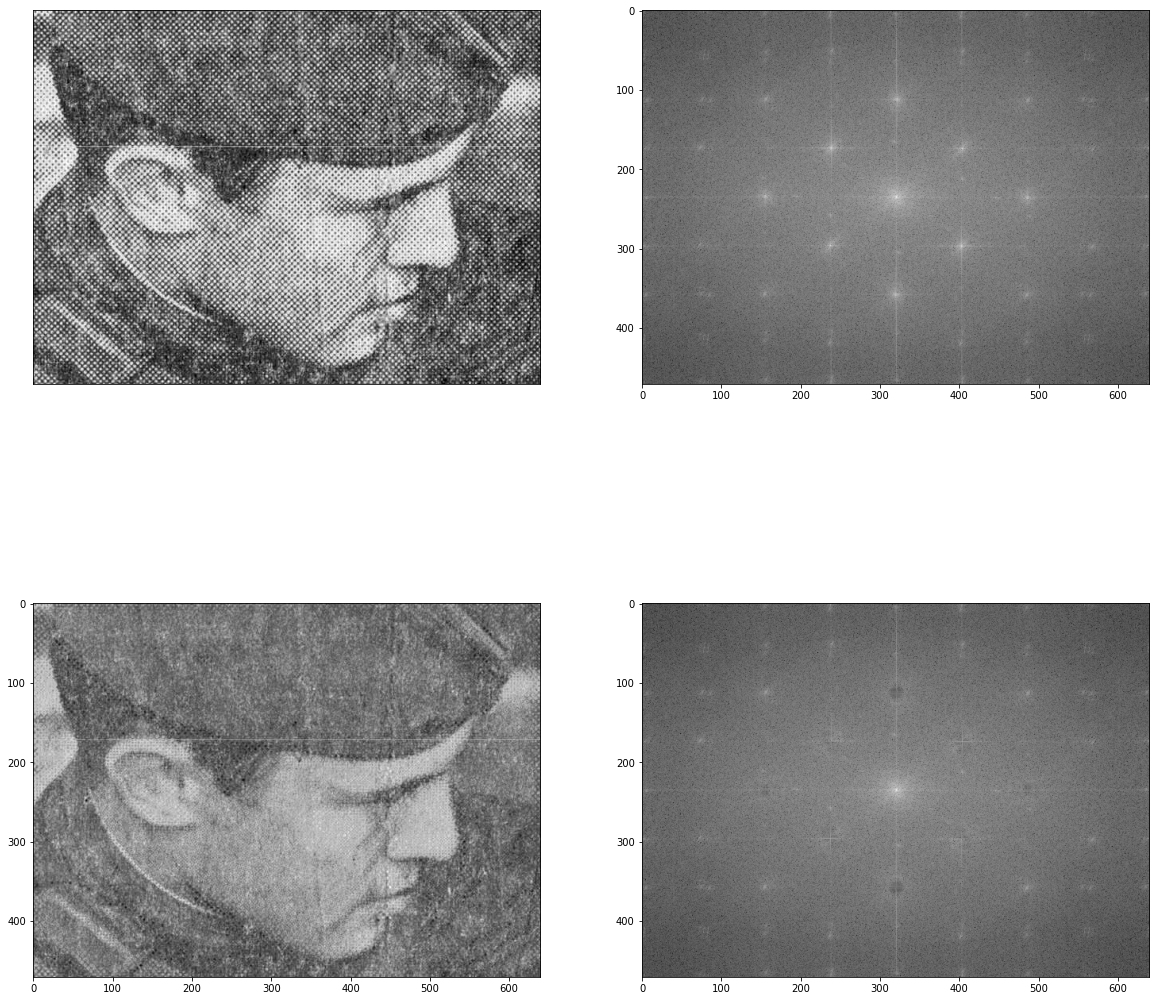

In [ ]:
pic1_orig = cv2.imread('pic0.jpg',0)
image1_np=np.array(pic1_orig)
PQ = dftfilter.paddedsize(image1_np)
#M, N = np.shape(image1_np)

H = bsfilter.bsfilter('nb-btw', PQ[0], PQ[1], 20, [2*55,2*80], 5)
H = H * bsfilter.bsfilter('nb-btw', PQ[0], PQ[1], 20, [2*55,2*555], 5)
H = H * bsfilter.bsfilter('nb-btw', PQ[0], PQ[1], 20, [2*405,2*80], 5)
H = H * bsfilter.bsfilter('nb-btw', PQ[0], PQ[1], 20, [2*405,2*555], 5)
H = H * bsfilter.bsfilter('nb-btw', PQ[0], PQ[1], 20, [2*125,0], 5)
H = H * bsfilter.bsfilter('nb-btw', PQ[0], PQ[1], 20, [0,2*170], 5)
H = H * bsfilter.bsfilter('nb-btw', PQ[0], PQ[1], 20, [2*350,0], 5)
H = H * bsfilter.bsfilter('nb-btw', PQ[0], PQ[1], 20, [0,2*480], 5)


g = dftfilter.filter(image1_np, H)

f1 = np.fft.fft2(image1_np)
f1 = np.fft.fftshift(f1)
orig_magnitude_spectrum = np.log(1+np.abs(f1))

f2 = np.fft.fft2(g)
f2 = np.fft.fftshift(f2)
g_magnitude_spectrum = np.log(1+np.abs(f2))


plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np, cmap='gray')
plt.subplot(2,2,2), plt.imshow(orig_magnitude_spectrum, cmap='gray')
plt.subplot(2,2,3), plt.imshow(g, cmap='gray')
plt.subplot(2,2,4), plt.imshow(g_magnitude_spectrum, cmap='gray')





##Аналіз параметрів шуму


 ----- Standard deviation = 12.783842771248402

 ----- The population mean = 138.958


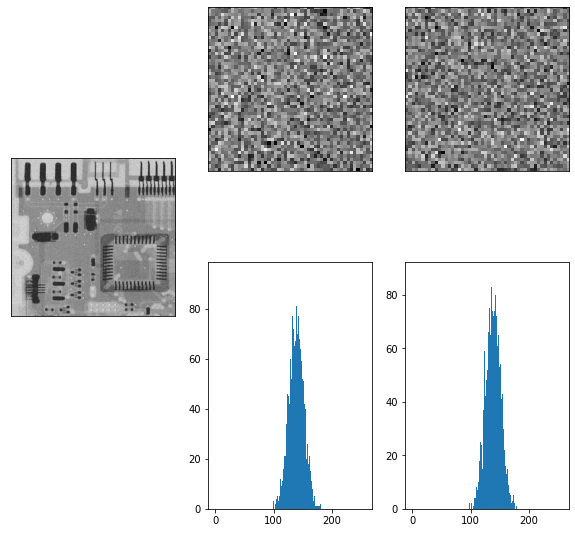

In [ ]:
pic1_orig = cv2.imread('pic1.jpg',0)
image1_np=np.array(pic1_orig)

deviation = np.std(image1_np[225:275, 150:200])
mean = np.mean(image1_np[225:275, 150:200])
noise = imnoise2.imnoise2('gaussian', (50,50), mean, deviation)

plt.figure(figsize = (10,10))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic1_orig, cmap='gray')
plt.subplot(2,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(pic1_orig[225:275, 150:200], cmap='gray')
plt.subplot(2,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(noise, cmap='gray')
plt.subplot(2,3,5), plt.hist(pic1_orig[225:275, 150:200].ravel(), bins=256, range=(0,255))
plt.subplot(2,3,6), plt.hist(noise.ravel(), bins=256, range=(0,255))

print ("\n ----- Standard deviation = " + str(deviation))
print ("\n ----- The population mean = " + str(mean))

##Заглушення шумів за допомогою просторової фільтрації

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57830ffc18>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f57830cad30>)

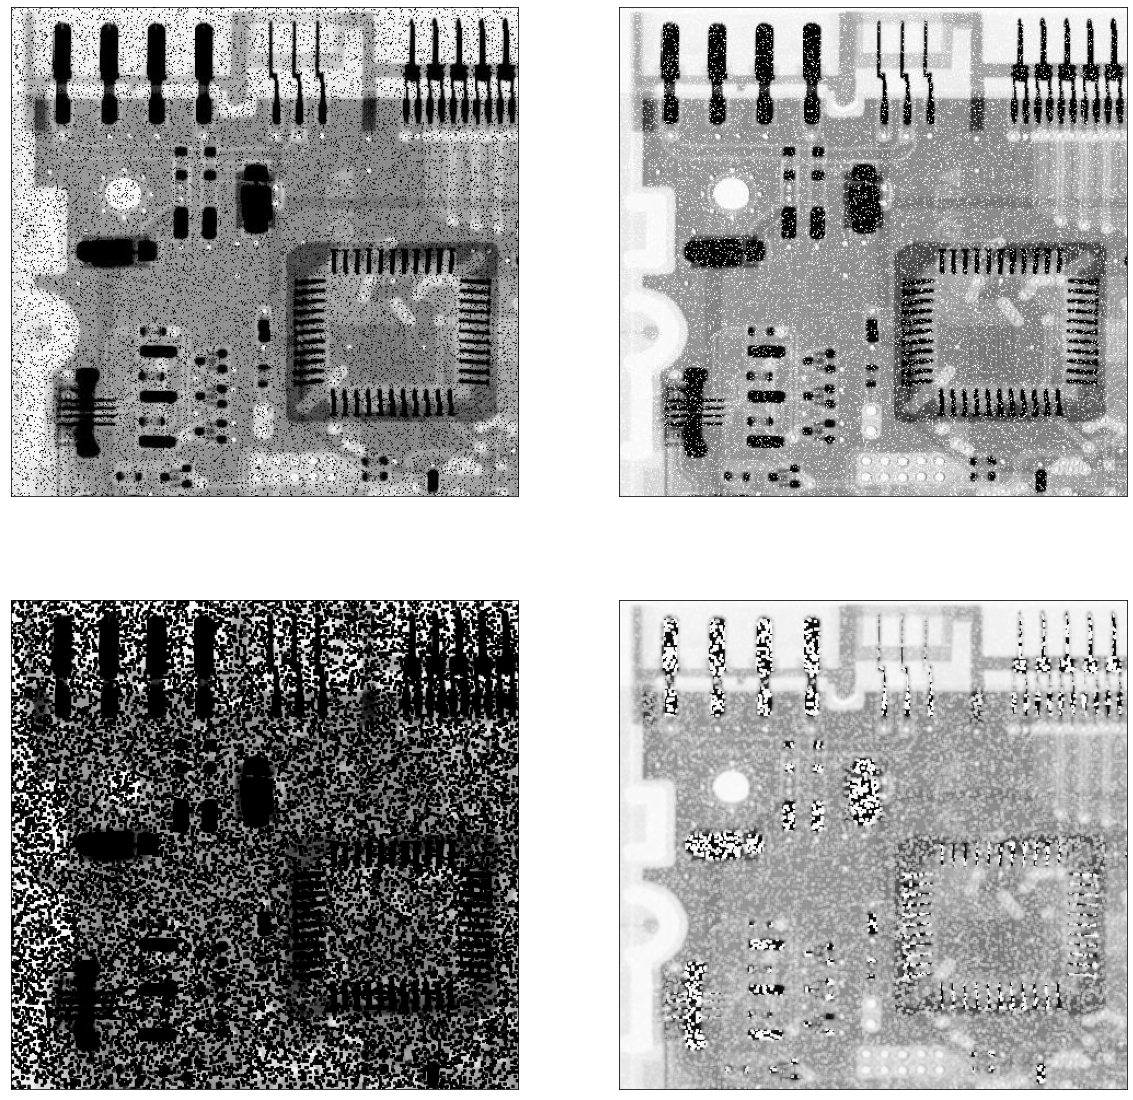

In [ ]:
pic1_orig = cv2.imread('pic2.jpg',0)
pic2_orig = cv2.imread('pic3.jpg',0)

image1_np=np.array(pic1_orig)
image2_np=np.array(pic2_orig)

result_1 = spfilt.spfilt(image1_np, 'chmean', 3, 3, -1.5)
result_2 = spfilt.spfilt(image2_np, 'chmean', 3, 3, 1.5)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(image2_np, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]),plt.imshow(result_1, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]),plt.imshow(result_2, cmap='gray')

##Заглушення шумів за допомогою адаптивної медіанної фільтрації

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2bf9e4a198>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f2bf9e066d8>)

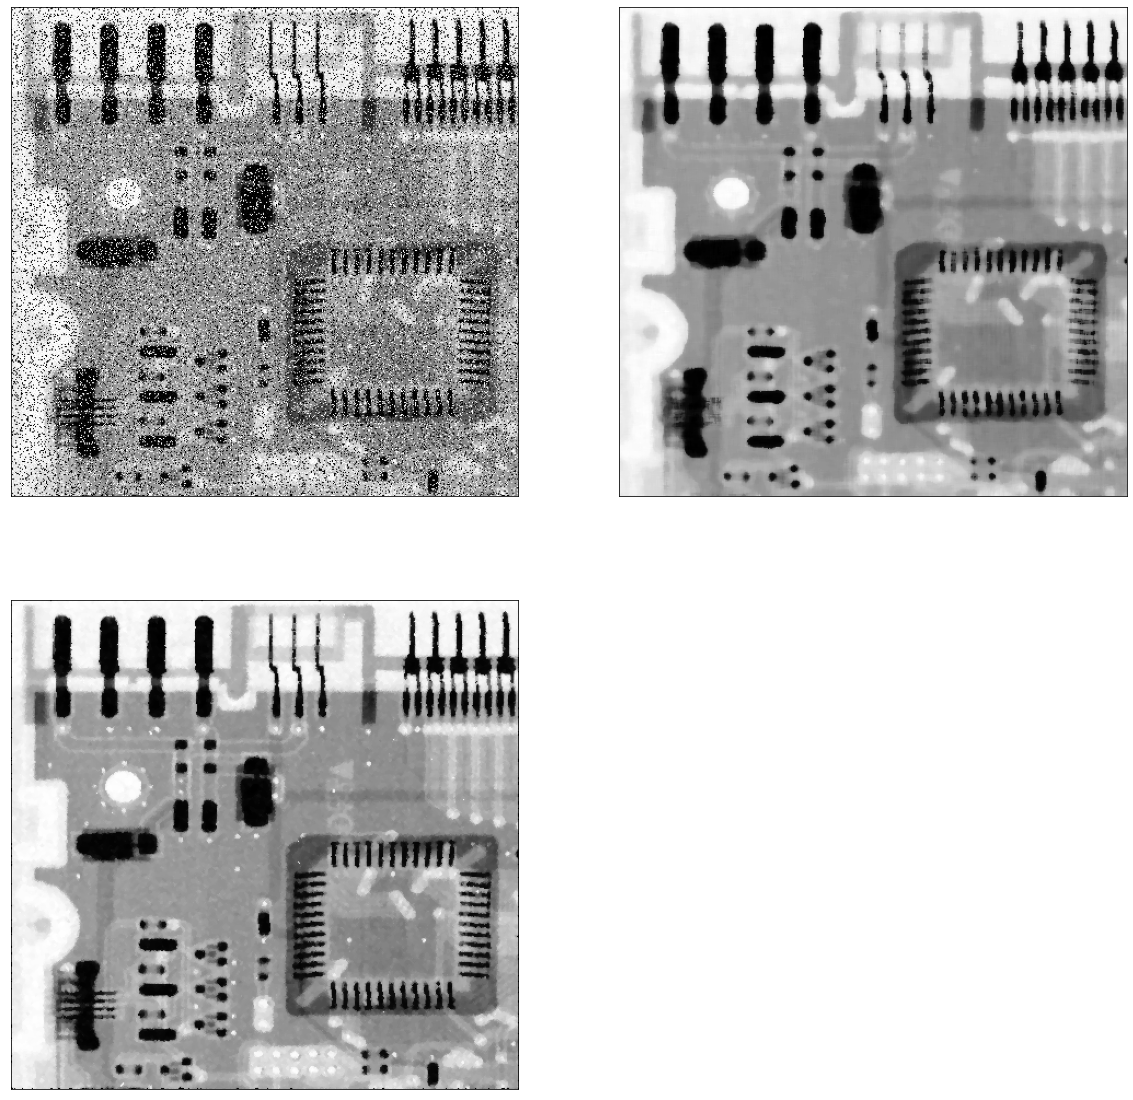

In [ ]:
pic1_orig = cv2.imread('pic4.jpg',0)
image1_np=np.array(pic1_orig)

result_1 = spfilt.spfilt(image1_np, 'median', 7, 7)
result_2 = fspecial.adpmedian(image1_np, 7, 4)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(result_1, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(result_2, cmap='gray')

##Моделювання спотворюючої функції

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57828cd160>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f578288a630>)

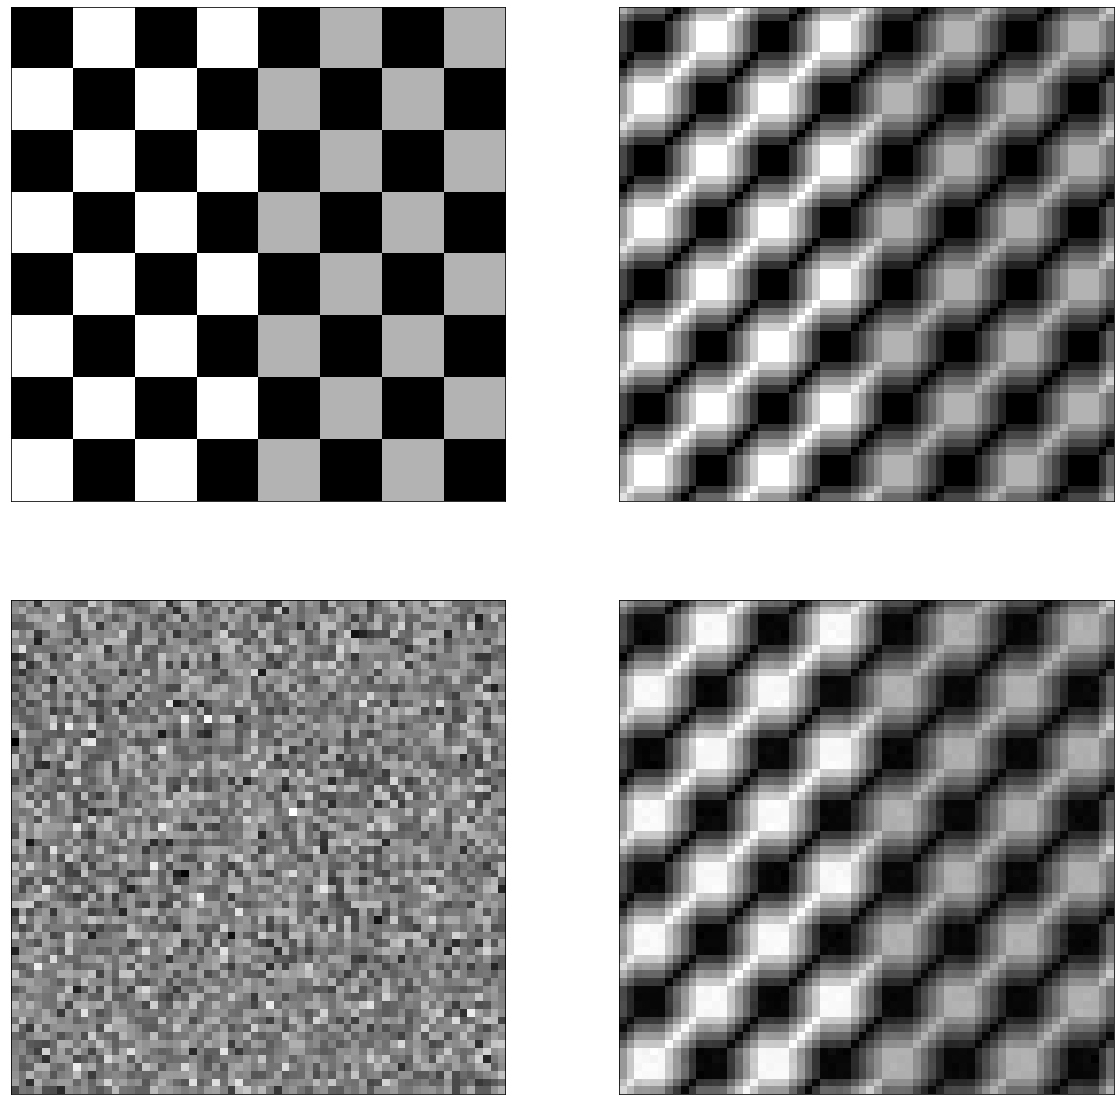

In [ ]:
f = checkerboard.checkerboard(8)

kernel_size = 5
PSF = np.zeros((kernel_size, kernel_size))
PSF[int((kernel_size - 1)/2) : int((kernel_size - 1)/2)] = np.fill_diagonal(np.flipud(PSF), 1)
PSF /= kernel_size

# Apply the horizontal kernel.
GB = signal.convolve2d(f, PSF, mode='same', boundary='wrap', fillvalue=0)
noise_mean = 0;
noise_var = 0.01;
noise = imnoise2.imnoise2('gaussian', np.shape(f), noise_mean, noise_var)
g = GB + noise

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(f, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]),plt.imshow(GB, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(noise, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]),plt.imshow(g, cmap='gray')

##Інверсна фільтрація зображення.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57829aa2e8>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f5782808630>)

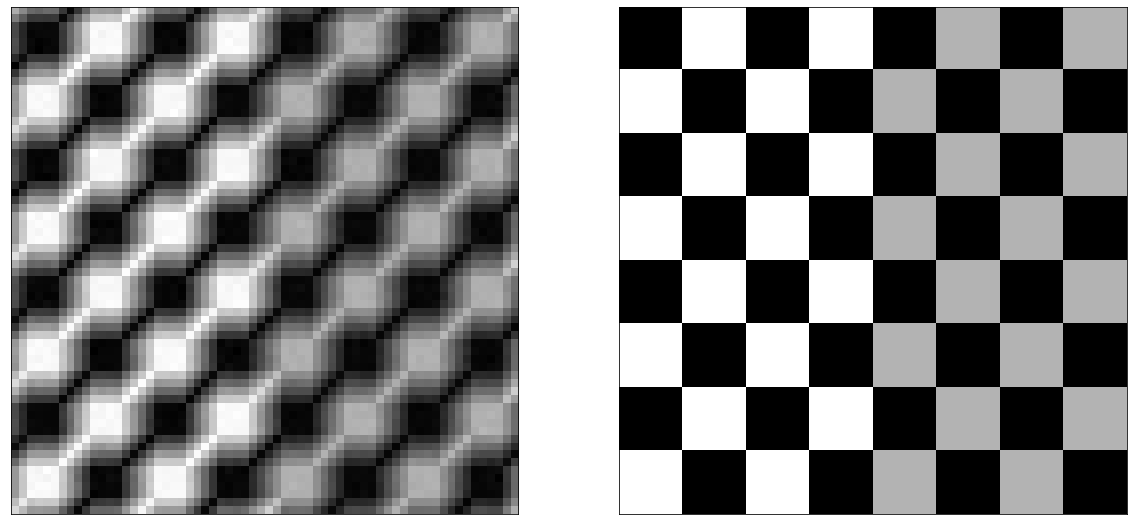

In [ ]:
fr = deconvwnr.deconvwnr(GB, PSF)

plt.figure(figsize = (20,20))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(g, cmap='gray')
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]),plt.imshow(fr, cmap='gray')

##Вінерівська фільтрація зображення.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57827c2358>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f57827778d0>)

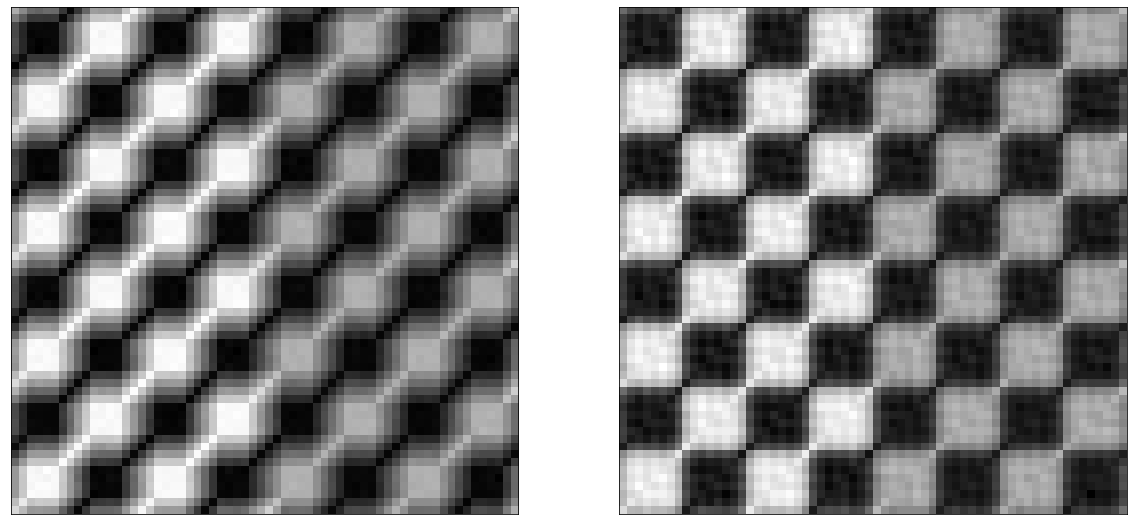

In [ ]:
#Sn = np.abs(np.fft.fft2(noise)) ** 2
#nA = np.sum(Sn[:]) / np.size(noise)
#Sf = np.abs(np.fft.fft2(f)) ** 2
#fA = np.sum(Sf[:]) / np.size(g)
#R = nA / fA
estimated_nsr = noise_var / np.var(f[:])
fr2 = deconvwnr.deconvwnr(g, PSF, estimated_nsr)

plt.figure(figsize = (20,20))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(g, cmap='gray')
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]),plt.imshow(fr2, cmap='gray')

##Сліпа деконволюція.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f57825c9898>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f5782585dd8>)

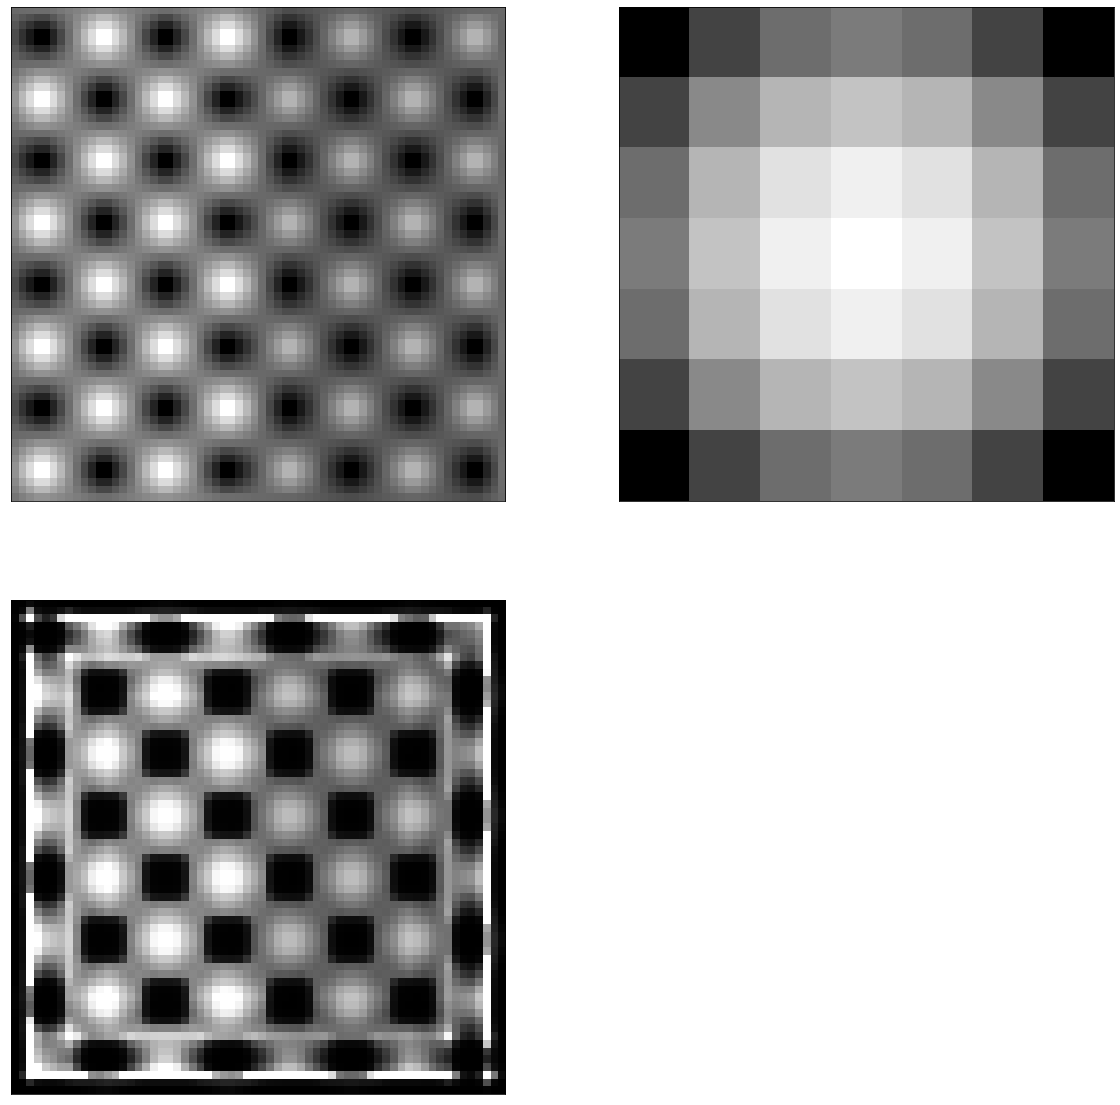

In [ ]:
I = checkerboard.checkerboard(8)

PSf = fspecial.gaussian((7,7),8)
GB = signal.convolve2d(I, PSf, mode='same', boundary='wrap', fillvalue=0)
noise = imnoise2.imnoise2('gaussian', np.shape(I), 0, 0.03)
g = GB

initPSf = np.ones(np.shape(PSF))
f = restoration.richardson_lucy(g, initPSf, 20)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(g, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(PSf, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(f, cmap='gray')
#plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(PSFe, cmap='gray')

##Геометричні просторові перетворення зображення

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5784e9d438>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f5784eb70b8>)

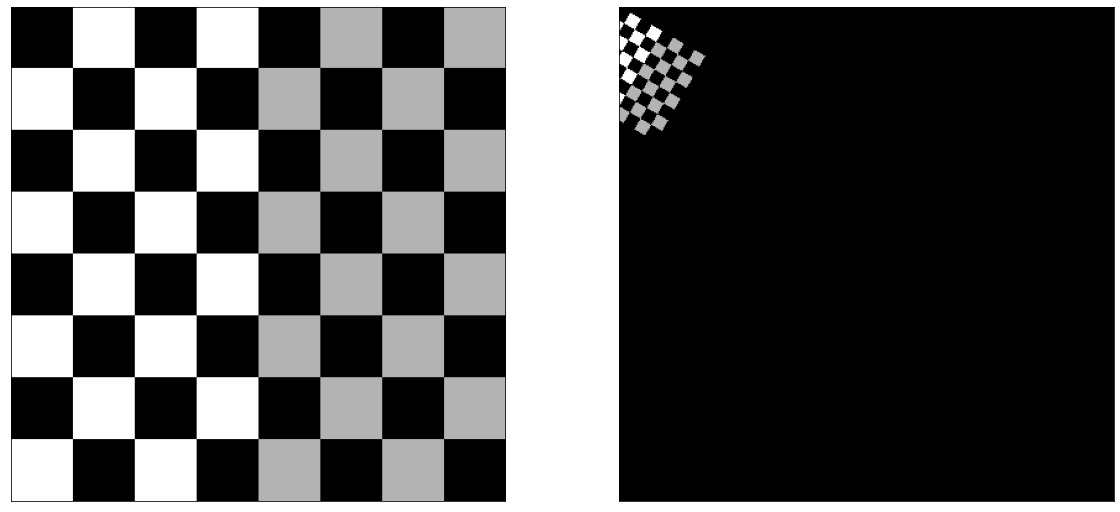

In [ ]:
f = checkerboard.checkerboard(50)
s = 5
t = math.pi / 6
delta_x = 0
delta_y = 0

T = np.array([[s*math.cos(t), s*math.sin(t), 0], 
              [-s*math.sin(t), s*math.cos(t), 0], 
              [delta_x, delta_y, 1]])

tform = transform.AffineTransform(T)
g = transform.warp(f, tform)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(f, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(g, cmap='gray')

##Реєстрація зображень

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe20e9a0e80>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7fe20d7d94e0>)

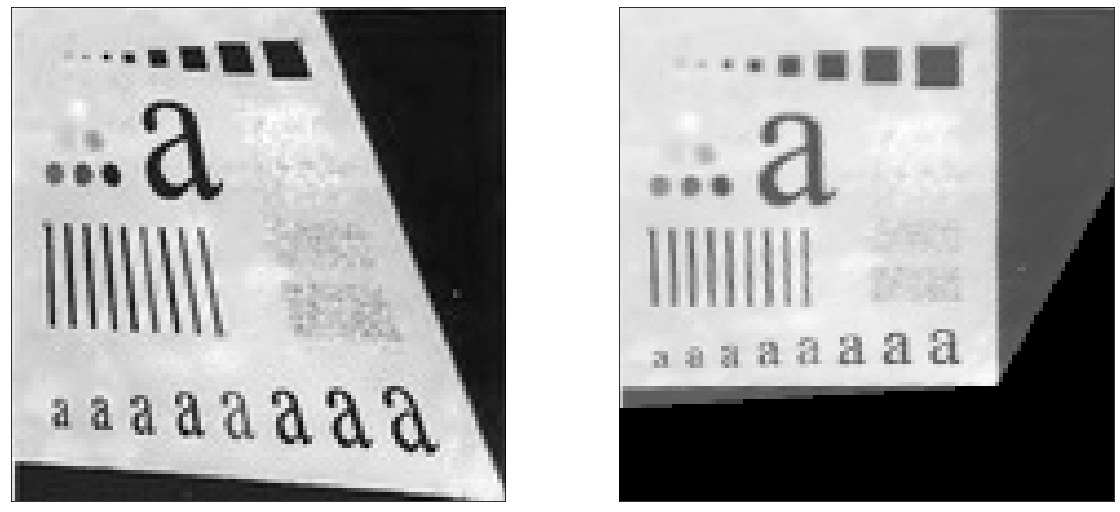

In [ ]:
pic1_orig = cv2.imread('pic6.jpg',0)
image1_np=np.array(pic1_orig)

basepoints = np.array([[14, 13], [77, 9], [7, 50], [43, 68], [74, 76]])
inputpoints = np.array([[13, 11], [65, 8], [8, 49], [48, 75], [90, 92]])
tform = transform.ProjectiveTransform()
tform.estimate(basepoints, inputpoints)
gp = transform.warp(image1_np, tform)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(gp, cmap='gray')